In [ ]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime and set GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one.
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install pandas

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
#WebDriver is a browser automation framework that works with open source APIs.
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
cp: '/u

In [ ]:
total = 5000
actual_n = 0
current_page = 435
dates = []
messages = []
pages = []

driver = webdriver.Chrome(options = chrome_options)

while len(messages)<total:
    URL = 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p'+str(current_page)
    driver.implicitly_wait(1)
    driver.get(URL)
    comments = driver.find_elements("xpath", ".//div[@class='DataBox DataBox-Comments']/ul/li")
    for item in comments:
        date = item.find_element("xpath", ".//div[@class='Comment']/div[@class='Item-Header CommentHeader']/div[@class='Meta CommentMeta CommentInfo']/span/a/time").get_attribute("datetime")
        message = item.find_element("xpath", ".//div[@class='Comment']/div[@class='Item-BodyWrap']/div[@class='Item-Body']/div[@class='Message userContent']")
        message = message.text.strip().split('\n')[-1]
        dates += [date]
        messages += [message]
        pages += [current_page]
    print(f"page: {current_page}, number of comments: {len(messages)}")
    current_page -= 1

driver.quit()

page: 435, number of comments: 33
page: 434, number of comments: 83
page: 433, number of comments: 133
page: 432, number of comments: 183
page: 431, number of comments: 233
page: 430, number of comments: 283
page: 429, number of comments: 333
page: 428, number of comments: 383
page: 427, number of comments: 433
page: 426, number of comments: 483
page: 425, number of comments: 533
page: 424, number of comments: 583
page: 423, number of comments: 633
page: 422, number of comments: 683
page: 421, number of comments: 733
page: 420, number of comments: 783
page: 419, number of comments: 833
page: 418, number of comments: 883
page: 417, number of comments: 933
page: 416, number of comments: 983
page: 415, number of comments: 1033
page: 414, number of comments: 1083
page: 413, number of comments: 1133
page: 412, number of comments: 1183
page: 411, number of comments: 1233
page: 410, number of comments: 1283
page: 409, number of comments: 1333
page: 408, number of comments: 1383
page: 407, num

KeyboardInterrupt: ignored

In [ ]:
total_csv = pd.DataFrame()
total_csv['page'] = pages
total_csv['date'] = pd.to_datetime(dates)
total_csv['message'] = messages
total_csv['message'] = total_csv['message'].str.lower()
total_csv.to_csv('messages_dates_p435_p335.csv')

!ls
from google.colab import files
files.download("messages_dates_p435_p335.csv")

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import scipy.stats as ss
import math

from collections import Counter
import numpy as np
import statsmodels.api as sm

# upload car_models_and_brands and messages_edmunds file
from google.colab import files
uploaded = files.upload()

**Task A: Once you fetch the data, test if the data support Zipf’s law econometrically. Additionally plot the most common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization.
Check http://www.garysieling.com/blog/exploring-zipfs-law-with-python-nltk-scipy-and-matplotlib
(Note that the above link does NOT test Zipf’s law econometrically)**


   page                       date  \
0   435  2020-02-25 19:38:57+00:00   
1   435  2020-02-25 19:41:26+00:00   
2   435  2020-02-25 19:44:12+00:00   
3   435  2020-02-25 19:47:21+00:00   
4   435  2020-02-25 19:50:32+00:00   

                                             message  
0  and, that's on top of any discount you negotia...  
1  add $350 to any lease on a kia if you are not ...  
2  did you hear about the key fob scam the dealer...  
3  that's a jaw-dropping lease incentive. amazing...  
4  i'm pretty sure that's the case with any capti...  
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 6.505e+05
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:33:27   Log-Li

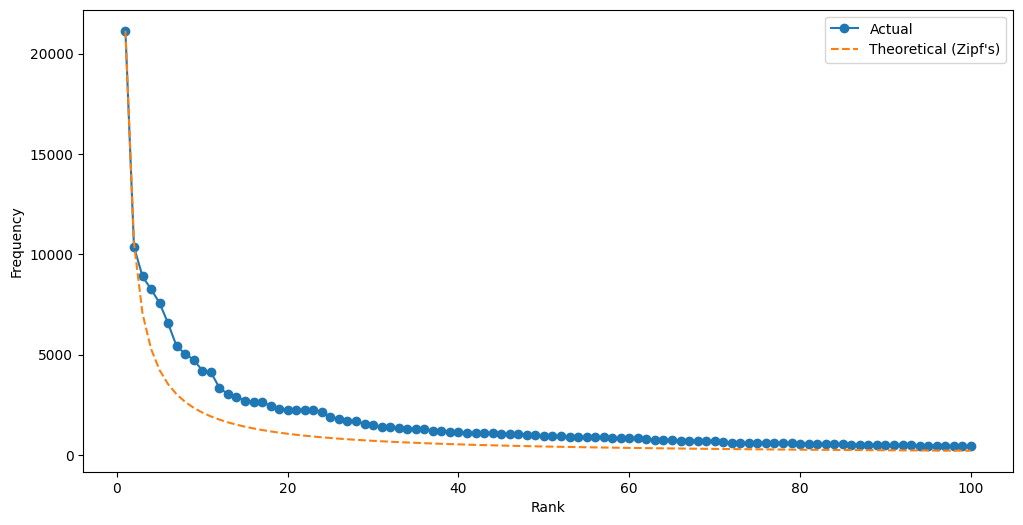

In [ ]:
data = pd.read_csv('messages_dates_p435_p335.csv',index_col=0)
data['message'] = data['message'].str.lower()

print(data.head())
texts = data['message'].str.cat(sep=' ').split()

word_counts = Counter(texts)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

ranks = np.arange(1, len(sorted_word_counts) + 1)
frequencies = [count for word, count in sorted_word_counts]

# Log transformation
log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)

# Linear regression
model = sm.OLS(log_frequencies, sm.add_constant(log_ranks)).fit()
print(model.summary())

import matplotlib.pyplot as plt

# Top 100 words
top_ranks = ranks[:100]
top_frequencies = frequencies[:100]

# Theoretical prediction
theoretical_frequencies = top_frequencies[0] / top_ranks

plt.figure(figsize=(12, 6))
plt.plot(top_ranks, top_frequencies, label="Actual", marker='o')
plt.plot(top_ranks, theoretical_frequencies, label="Theoretical (Zipf's)", linestyle='--')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Task B: Find the top 10 brands from frequency counts. You will need to write a script to count the frequencies of words (stopwords should NOT be counted). Replace frequently occurring car models with brands so that from now on you have to deal with only brands and not models. You will need another script for this job. A list of model and brand names (not exhaustive) are provided in a separate file. Even if a brand (e.g., BMW) is mentioned multiple times in a message, it should be counted as 1.**

In [ ]:
total_csv = pd.read_csv('messages_dates_p435_p335.csv',index_col=0)
total_csv = total_csv[~total_csv['message'].isnull()]
total_csv['message'] = total_csv['message'].str.lower()
print(len(total_csv))
total_csv.head()

5029


,page,date,message
0,435,2020-02-25 19:38:57+00:00,"and, that's on top of any discount you negotia..."
1,435,2020-02-25 19:41:26+00:00,add $350 to any lease on a kia if you are not ...
2,435,2020-02-25 19:44:12+00:00,did you hear about the key fob scam the dealer...
3,435,2020-02-25 19:47:21+00:00,that's a jaw-dropping lease incentive. amazing...
4,435,2020-02-25 19:50:32+00:00,i'm pretty sure that's the case with any capti...


In [ ]:
#fixing Brands names
simils = pd.read_csv('car_models_and_brands.csv')
simils['Brand'].unique()

array(['acura', 'audi', 'bmw', 'buick', 'cadillac', 'car', 'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyndai kia', 'hyundai',
       'hyundai,', 'hyundai.', 'infiniti', 'kia', 'kia,', 'kia.',
       'lincoln', 'mazda', 'mercedes', 'mercedes benz', 'mercedes-benz',
       'mercury', 'mitsubishi', 'nissan', 'nissan.', 'pontiac', 'problem',
       'saturn', 'seat', 'sedan', 'subaru', 'suzuki', 'toyata', 'toyota',
       'volkswagen', 'volkwagen', 'volvo'], dtype=object)

In [ ]:
#fixing Brands names
simils['Brand'].replace(to_replace=['hyundai,','hyundai.','kia,', 'kia.','mercedes benz', 'mercedes-benz','nissan.','toyata','volkwagen','hyndai kia'],value=['hyundai','hyundai','kia','kia','mercedes','mercedes','nissan','toyota','volkswagen','hyundai kia'],regex=True,inplace=True)
total_csv['message'].replace(to_replace=['\)','\.','\:','\?','\!','\(','\-','\,','\"',"'s","'d"],value='',regex=True,inplace=True)
total_csv['message'].replace(to_replace=simils['Model'].values,value=simils['Brand'].values,regex=True,inplace=True)
total_csv['message'].replace(to_replace=['toyotad','tchrysler','s4'],value=['toyota','chrysler','audi'],regex=True,inplace=True)
#s4
total_csv.head()

,page,date,message
0,435,2020-02-25 19:38:57+00:00,and that on top of any discount you negotiate ...
1,435,2020-02-25 19:41:26+00:00,add $350 to any lease on a kia if you are not ...
2,435,2020-02-25 19:44:12+00:00,did you hear about the key fob scam the dealer...
3,435,2020-02-25 19:47:21+00:00,that a jawdropping lease incentive amazing dea...
4,435,2020-02-25 19:50:32+00:00,i'm pretty sure that the case with any captive...


In [ ]:
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

def unique_list(df):
    return list(set(df))

def get_to_sort(tuplee):
    return tuplee[-1]

edmunds_words = list(np.concatenate(total_csv['message'].str.split(' ').apply(unique_list).values))
words = set(edmunds_words)
edmunds_counts = [(w, edmunds_words.count(w)) for w in words if w not in stopwords_list]
edmunds_counts = sorted(edmunds_counts, key=get_to_sort, reverse=True)
edmunds_counts = pd.DataFrame(edmunds_counts,columns=['word','freq'])
edmunds_counts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,word,freq
0,car,1761
1,like,1110
2,one,983
3,would,957
4,,920
...,...,...
23862,imperialcadillac,1
23863,dinner/show,1
23864,ae,1
23865,unfazed,1


In [ ]:
top10_car_brands = ['bmw','audi','acura','toyota','honda','chrysler','volkswagen','cadillac','hyundai','mercedes']
matrix_names = edmunds_counts[edmunds_counts['word'].isin(top10_car_brands)]
matrix_names = matrix_names.set_index('word')
matrix_names


,freq
word,
bmw,910
audi,836
acura,453
toyota,440
honda,381
chrysler,362
volkswagen,233
cadillac,187
hyundai,176


**Task C: Calculate lift ratios for associations between the top-10 brands identified in Task A. You will have to write a script to do this task). For lift calculations, be sure not to count a mention more than once per post, even if it is mentioned multiple times in the post. In your code, ensure that a message is not counted in the lift calculations if the mentions of two brands are separated by more than, say, 5 or 7 words.**

In [ ]:
def get_n_ab(lista):
    word_distance = 15
    sub_n_ab = 0
    for i in range(0,len(lista)-word_distance):
        sublista = lista[i:i+word_distance]
        if (a in sublista) and (b in sublista):
            sub_n_ab = 1
            break
    return sub_n_ab

In [ ]:
matrix_lifts = pd.DataFrame(index=top10_car_brands ,columns=top10_car_brands)
for i in range(len(top10_car_brands)):
    for j in range(len(top10_car_brands)):
        #if j>i:
        a = top10_car_brands[i]
        b = top10_car_brands[j]
        n_ab = sum(total_csv['message'].str.lower().str.split(' ').apply(get_n_ab))
        matrix_lifts.iloc[i,j] = (n_ab*len(total_csv))/(matrix_names.loc[a,'freq']*matrix_names.loc[b,'freq'])

In [ ]:
half_m = pd.DataFrame(index=top10_car_brands ,columns=top10_car_brands)
for i in range(len(top10_car_brands)):
    for j in range(len(top10_car_brands)):
        if j>i:
            a = top10_car_brands[i]
            b = top10_car_brands[j]
            half_m.iloc[i,j] = matrix_lifts.iloc[i,j]

half_m

,bmw,audi,acura,toyota,honda,chrysler,volkswagen,cadillac,hyundai,mercedes
bmw,NaN,1.163447,0.597776,0.439598,0.290098,0.290058,0.450648,1.182112,0.659397,2.835902
audi,NaN,NaN,1.062349,0.505853,0.442088,0.847495,1.729793,1.351086,0.581047,2.334983
acura,NaN,NaN,NaN,0.529846,2.360171,3.434732,0.333523,1.306064,0.441539,1.679839
toyota,NaN,NaN,NaN,NaN,1.199952,0.37888,0.932023,0.672326,1.363753,0.526361
honda,NaN,NaN,NaN,NaN,NaN,2.297146,0.736451,0.282342,0.974961,0.260516
chrysler,NaN,NaN,NaN,NaN,NaN,NaN,0.298117,0.371451,0.394667,0.274189
volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.577104,0.490538,1.135984
cadillac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.916808,3.715487
hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751944
mercedes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Task D: Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there are multiple scripts available on GitHub). - top10?**

In [ ]:
inv_matrix_lifts = matrix_lifts.applymap(lambda x: 1/x if pd.notna(x) and x != 0 else 0)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


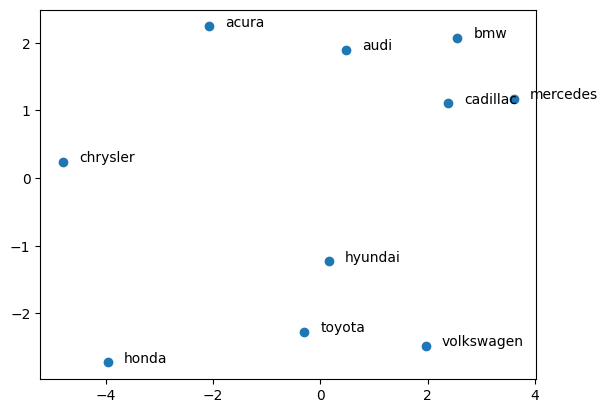

In [ ]:
from sklearn.manifold import MDS


mds = MDS(random_state=0)
scaled_df = mds.fit_transform(inv_matrix_lifts)


import matplotlib.pyplot as plt

# create scatterplot
plt.scatter(scaled_df[:,0], scaled_df[:,1])

# add labels
for i, txt in enumerate(inv_matrix_lifts.index):
    plt.annotate(txt, (scaled_df[:,0][i]+.3, scaled_df[:,1][i]))

# plot
plt.show()

**Task E: What insights can you offer to your client from your analyses in Tasks C and D?**

Insights:
1. BMW, Mercedes, and Audi are closely related to each other. Customers tend to look at this three bands in a similar fashion. What is interesting here is that only for Mercedes we also have a bigger interaction with Cadillac, this is a reassurance for Mercedes that its brand can be considered as a competitor to "young" and "sporty" brands like Audi and bmw, but also close to a "high luxury" brand as Cadillac, making Mercedes a player on both sectors.
2. Honda, Toyota, Volkswagen and Hyundai are usually not considered luxury brands as a whole, but we believe there is an overlap between entry level luxury brands and high-end non luxury
3. We were expecting to have a big relation between Honda and Toyota since they are known to be competitors, but we found that when people talk about Honda, they also talk about Acura and Chrysler

Reducing the distance between words to 7, Volkswagen appears far away from all brands. In other words, it is not compared to other luxury brand (bmw, mercedes, etc) but neither to the more affordable brands (toyota, hyundai, honda).

**Task F: What are 5 most frequently mentioned attributes or features of cars in the discussions? Which attributes are most strongly associated with which of these 5 brands? There is no need to plot the MDS plot for this question.**


In [ ]:
word_f = edmunds_counts.set_index("word")
word_f

,freq
word,
car,1761
like,1110
one,983
would,957
,920
...,...
imperialcadillac,1
dinner/show,1
ae,1


In [ ]:
common_attributes = ["price","dealer","sport","engine","performance","seat","luxury","looks","power","transmission"]

# get the lift of each one to each one of the brands
feature_lifts = pd.DataFrame(index=top10_car_brands ,columns=common_attributes)
for i in range(len(top10_car_brands)):
    for j in range(len(common_attributes)):
        #if j>i:
        a = top10_car_brands[i]
        b = common_attributes[j]
        n_ab = sum(total_csv['message'].str.lower().str.split(' ').apply(get_n_ab))
        feature_lifts.iloc[i,j] = (n_ab*len(total_csv))/(matrix_names.loc[a,'freq']*word_f.loc[b].freq)

feature_lifts

,price,dealer,sport,engine,performance,seat,luxury,looks,power,transmission
bmw,0.713532,0.97348,1.34693,0.67106,0.642602,0.79956,0.591299,0.342109,0.517247,0.492798
audi,0.731004,0.961836,0.927128,0.773428,0.746115,0.998325,0.668394,0.773428,0.770465,1.226099
acura,0.590209,0.872479,0.318324,0.832616,0.516351,0.566887,0.959393,0.845832,0.437499,0.707105
toyota,0.376162,0.433641,0.778356,0.326558,0.664508,0.486364,0.282211,0.380985,0.394122,1.019195
honda,0.334164,0.679648,0.615029,0.612833,0.409286,0.449344,0.597507,0.314273,0.520176,0.420365
chrysler,0.562725,0.263539,0.398345,0.694613,0.376922,0.709392,0.743208,1.058458,0.821218,1.415772
volkswagen,0.163927,0.526431,0.077361,0.462508,0.334631,0.551073,0.266465,0.411118,0.425294,0.549903
cadillac,0.817004,1.238975,0.192782,0.096047,0.729656,0.114439,1.992078,0.384186,0.0,0.171293
hyundai,0.723389,1.006667,1.024153,0.408198,0.0,0.243182,1.411055,0.816396,0.422274,0.181999
mercedes,0.586326,0.896627,0.592931,0.236325,0.769431,0.422368,1.361544,0.630201,0.162983,0.421472


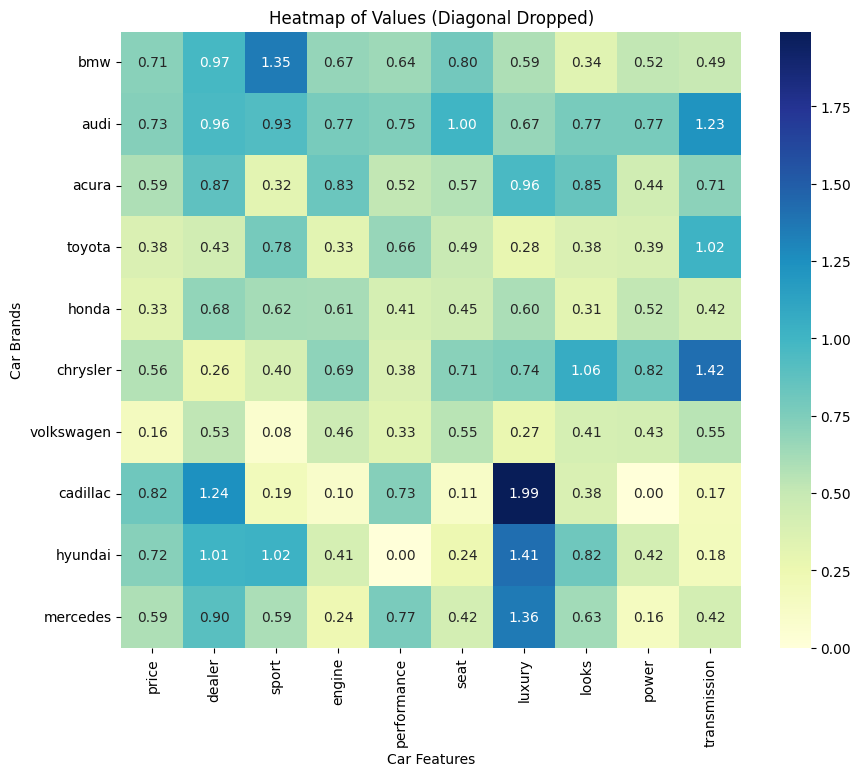

In [ ]:
import seaborn as sns

# Create a heatmap using Seaborn

feature_lifts = feature_lifts.astype(float)
plt.figure(figsize=(10, 8))

sns.heatmap(feature_lifts, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel("Car Features")
plt.ylabel("Car Brands")
plt.title("Heatmap of Values (Diagonal Dropped)")
plt.show()

**Task G: What advice will you give to your client from Task F?**



### Insights:


Seeing the table and the heatmap above we can compare the different brands and features between themselves. From the information, we got the following insights:

2. Dealer and Dealership Reputation:
- Cadillac is strongly correlated with the dealer experience. That means that when people are buying or seeing a Cadillac car in the dealer, they are having a really good experience.
- Hyundai cars also have a significant relationship with dealerships.


3. Sport and Performance:
- It was kind of expected to see BMW related with sport but it was interesting to see that Hyundai also has a significant lift with sports.
- The Top Sport brands are BMW, Hyundai and Audi.
- We can expect that the top "Sport" brands are the same with better Performance, but in our analysis it is not the case. One reason could be that Sport is related to the external appearance of the car and Performance is related to efficiency on the road.
- The Top Performance brand is Audi which is algo highly correlated with good engines. Followed by Mercedes and Toyota.


4. Cadillac dominates in terms of Luxury:
- Discussions about Luxury and branding are common for Cadillac compared to other brands. We can also highlight Mercedes and Hyundai. We didn't expect to have a significant lift between Hyundai and Luxury.


5. Mechanic features:
- Finally, other important features are Engine, Power and Transmission where Chrysler and Audi are the most popular brands in the forum. It is important to know that those three features are correlated.
- For Audi, we can think that the relationship is related with the performance. On the other hand, we have an hypothesis regarding Chrysler and its reliability.

6. Audi as the most balanced brand:
- As we can see in the table, Audi is a good performer for each rubric. We can assume that this brand has been able to satisfy all market segments.


### Advice


Our recommendation for JD power and Associates is based on two different strategies:

1. Hyundai is the brand that has the highest number of significant lifts. It has a significant lift with dealer, sport and luxury. Considering all features as positive we recommend JD power and Associates to consider including Hyundai in its portafolio.


2. To develop a marketing strategy where they can highlight each brand's qualities.


- Through Social Media segmentation, reach the clients that have most interest in some features and show them the brands aligned with their needs.
- Create an Ads plan to show brands related to their top features.


3. Create a walkthrough plan for the clients coming into the Dealership.


- The first step should be to identify the client's needs in order to understand what features are important for them.
- Go straight forward and show them cars of the brand that best achieve their needs.




**Task H: Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?**

* Real competition (brands?)
* What people talk about?
* Which associations are the strongest
* Branding and marketing implications
* Unexpected results and Aha moments

In [ ]:
common_attributes = ["buy","want"]

# get the lift of each one to each one of the brands
aspirational_lift_1 = pd.DataFrame(index=top10_car_brands ,columns=common_attributes)
for i in range(len(top10_car_brands)):
    for j in range(len(common_attributes)):
        #if j>i:
        a = top10_car_brands[i]
        b = common_attributes[j]
        n_ab = sum(total_csv['message'].str.lower().str.split(' ').apply(get_n_ab))
        aspirational_lift_1.iloc[i,j] = (n_ab*len(total_csv))/(matrix_names.loc[a,'freq']*word_f.loc[b].freq)

aspirational_lift_1

,buy,want
bmw,0.473075,0.678677
audi,0.561763,0.542756
acura,0.38877,0.306058
toyota,0.489202,0.486973
honda,0.410879,0.430058
chrysler,0.432444,0.417812
volkswagen,0.419916,0.324567
cadillac,0.732495,0.337006
hyundai,0.333547,0.716137
mercedes,0.643687,0.663369


In [ ]:
total_csv['message'].replace(to_replace=["dream to","hope to","wish","desire","dream of"],value='aspirational',regex=True,inplace=True)
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

def unique_list(df):
    return list(set(df))

def get_to_sort(tuplee):
    return tuplee[-1]

aspire_words = list(np.concatenate(total_csv['message'].str.split(' ').apply(unique_list).values))
words = set(aspire_words)
aspire_words = [(w, aspire_words.count(w)) for w in words if w not in stopwords_list]
aspire_words = sorted(aspire_words, key=get_to_sort, reverse=True)
aspire_words = pd.DataFrame(aspire_words,columns=['word','freq'])
aspire_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,word,freq
0,car,1761
1,like,1110
2,one,983
3,would,957
4,,920
...,...,...
23860,imperialcadillac,1
23861,dinner/show,1
23862,ae,1
23863,unfazed,1


In [ ]:
common_attributes = ["aspirational"]

aspirational_lift = pd.DataFrame(index=top10_car_brands ,columns=common_attributes)
for i in range(len(top10_car_brands)):
    for j in range(len(common_attributes)):
        #if j>i:
        a = top10_car_brands[i]
        b = common_attributes[j]
        n_ab = sum(total_csv['message'].str.lower().str.split(' ').apply(get_n_ab))
        aspirational_lift.iloc[i,j] = (n_ab*len(total_csv))/(matrix_names.loc[a,'freq']*word_f.loc[b].freq)

aspirational_lift

,aspirational
bmw,13.263297
audi,9.62488
acura,8.881236
toyota,4.571818
honda,7.919685
chrysler,5.556906
volkswagen,0.0
cadillac,16.135829
hyundai,0.0
mercedes,13.234211


**The most aspirational brand is Candillac. The above consider the phrases  {"dream to","hope to","wish","desire",'dream of'} as indicadors of aspiration. We also wanted to understand the relation between words related to aspiration and related to buy so we did a deeper analysis.**

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
from collections import Counter

# Assuming total_csv is already loaded
# total_csv = pd.read_csv('your_csv_file.csv')

# Download stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

# Create new columns for tags and initialize with 0
total_csv['aspirational_tag'] = 0
total_csv['acquisition_tag'] = 0
total_csv['both_tags'] = 0

# Define the words for aspiration and acquisition
aspiration_words = ["dream to", "hope to", "wish", "desire",'aspirational']
acquisition_words = ['buy', 'own', 'acquire', 'get', 'switch']

# Function to tag aspirational messages
def tag_aspirational(text):
    for aspire in aspiration_words:
        if aspire in text:
            return 1
    return 0

# Function to tag acquisition messages
def tag_acquisition(text):
    for acquire in acquisition_words:
        if acquire in text:
            return 1
    return 0

# Tagging the messages
total_csv['aspirational_tag'] = total_csv['message'].apply(tag_aspirational)
total_csv['acquisition_tag'] = total_csv['message'].apply(tag_acquisition)

# Tagging messages that meet both conditions
total_csv['both_tags'] = total_csv.apply(lambda row: 1 if row['aspirational_tag']==1 and row['acquisition_tag']==1 else 0, axis=1)

# Now you can proceed to calculate the lift or any other metric for the messages that have both tags.

# Count the occurrence of each tag
count_both_tags = total_csv['both_tags'].sum()
count_aspirational = total_csv['aspirational_tag'].sum()
count_acquisition = total_csv['acquisition_tag'].sum()
count_total = len(total_csv)

# Calculate Lift
if count_aspirational * count_acquisition == 0:
    lift = 0
else:
    lift = (count_both_tags * count_total) / (count_aspirational * count_acquisition)

# Your brands of interest
brands = ['bmw','audi','acura','toyota','honda','chrysler','volkswagen','cadillac','hyundai','mercedes']  # Replace with your actual brands
brand_lifts = {}

for brand in brands:
    count_brand = len(total_csv[total_csv['message'].str.contains(brand, case=False)])
    count_both_and_brand = len(total_csv[(total_csv['both_tags'] == 1) & (total_csv['message'].str.contains(brand, case=False))])

    if count_both_tags * count_brand == 0:
        brand_lift = 0
    else:
        brand_lift = (count_both_and_brand * count_total) / (count_both_tags * count_brand)

    brand_lifts[brand] = brand_lift

print("Lift between Aspirational and Acquisition:", lift)
print("Brand Lifts:", brand_lifts)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lift between Aspirational and Acquisition: 1.6254444195818105
Brand Lifts: {'bmw': 2.170679821180823, 'audi': 2.486060969215789, 'acura': 1.6366568047337278, 'toyota': 2.4714217459559076, 'honda': 2.4304470398711238, 'chrysler': 1.7763343799058084, 'volkswagen': 2.657721667645332, 'cadillac': 4.571818181818182, 'hyundai': 1.2379076923076924, 'mercedes': 4.625334448160535}


In [ ]:
# ... Previous code lines for imports, and other setup

# Debug: Checking how many messages get tagged
print(f"Total number of messages: {len(total_csv)}")
print(f"Number of aspirational messages: {total_csv['aspirational_tag'].sum()}")
print(f"Number of acquisition messages: {total_csv['acquisition_tag'].sum()}")
print(f"Number of messages with both tags: {total_csv['both_tags'].sum()}")

# ... Previous code lines for lift calculation

# Debug: Checking the lift for
import matplotlib.pyplot as plt

# Assuming brand_lifts is your dictionary containing the lifts for each brand
# Example: brand_lifts = {'bmw': 0.5, 'audi': 0.3, 'acura': 0.2, ...}

# Extract brand names and their corresponding lift values
brands = list(brand_lifts.keys())
lift_values = list(brand_lifts.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(brands, lift_values, color='skyblue')
plt.xlabel('Lift Value')
plt.title('Brand Lifts for Aspirational and Acquisition Messages')
plt.gca().invert_yaxis()  # Optionally invert Y-axis for better visibility

# Annotate each bar with the actual lift value
for index, value in enumerate(lift_values):
    plt.text(value, index, str(round(value, 2)))

plt.show()

Total number of messages: 5029
Number of aspirational messages: 109
Number of acquisition messages: 1845
Number of messages with both tags: 65


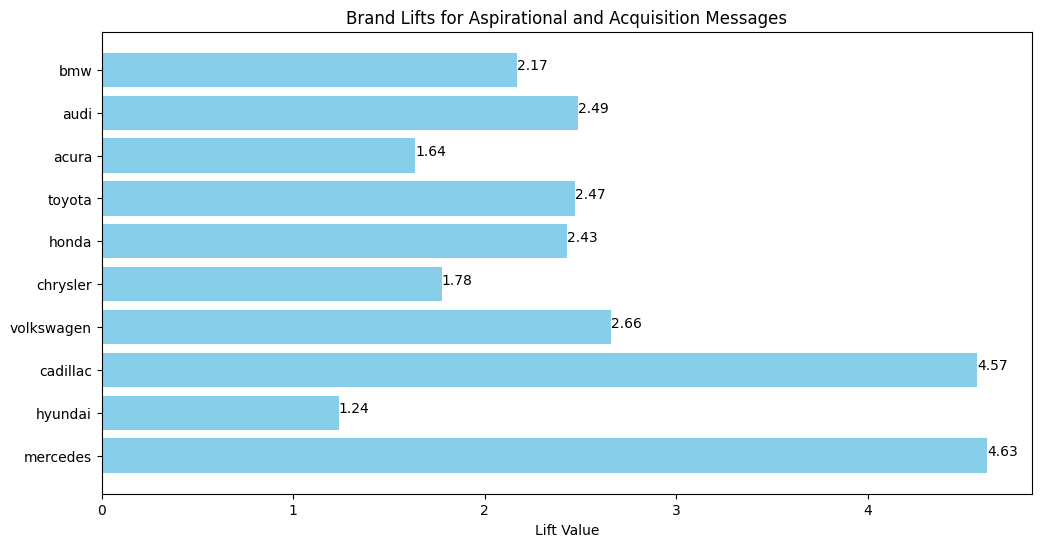

In [ ]:
import matplotlib.pyplot as plt

# Assuming brand_lifts is your dictionary containing the lifts for each brand
# Example: brand_lifts = {'bmw': 0.5, 'audi': 0.3, 'acura': 0.2, ...}

# Extract brand names and their corresponding lift values
brands = list(brand_lifts.keys())
lift_values = list(brand_lifts.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(brands, lift_values, color='skyblue')
plt.xlabel('Lift Value')
plt.title('Brand Lifts for Aspirational and Acquisition Messages')
plt.gca().invert_yaxis()  # Optionally invert Y-axis for better visibility

# Annotate each bar with the actual lift value
for index, value in enumerate(lift_values):
    plt.text(value, index, str(round(value, 2)))

plt.show()


**Analysis:**
**Real Competition (brands?):**

Given the data, Mercedes' closest competitor in aspirational value is Cadillac, with Audi, Toyota, and Honda also showing strong lift scores.

**What People Talk About?**

People are discussing not only the desirability of these cars ("dream to", "hope to") but also the actual acquisition of them ("buy", "own"). This indicates a high degree of consumer interest that goes beyond mere admiration.

**Which Associations Are the Strongest:**

Brands like Mercedes and Cadillac are most strongly associated with both aspirational and acquisition-related terms, making them prime targets for those who don't just aspire to own a luxury vehicle but are also considering actually buying one. This also points to the fact that within this segment of luxury vehicles, these two brands are relatively much more liekly to be considered before the other brands mentioned.

**Branding and Marketing Implications:**

For Mercedes, this high level of aspiration and intent to purchase presents a golden opportunity to capitalize on this consumer sentiment through targeted marketing campaigns that speak to both the aspirational and practical aspects of owning a Mercedes.

**Unexpected Results and Aha Moments:**

One surprising result could be that brands traditionally considered more "everyday" or "affordable" like Toyota and Honda also have high lift scores. This might indicate that these brands offer models or features that are viewed as both aspirational and attainable.

**Business Implications:**
For Mercedes: The high lift score suggests an opportunity to leverage this aspiration in marketing messages. Special financing or features could be offered to make the "dream" more attainable. Customer retention should also be a focus, as people talking aspirationally about Mercedes are also considering acquisition.

For Cadillac: Cadillac's high lift score reveals it has strong aspirational pull among consumers. However, Cadillac generally falls in the luxury segment, and many consumers who aspire to own it may currently be in non-luxury vehicles. Marketing strategies could aim to ease this transition, perhaps through trade-in incentives for non-luxury vehicles or payment plans that make it easier to move up to a Cadillac. Customer retention efforts should also be fortified to hold onto these aspirational customers once they make the leap.

For Toyota: Despite being a mass-market brand, Toyota shows a high lift score, revealing it's aspired to and considered for acquisition. Toyota could leverage this by promoting its higher-end models or luxury features to tap into this aspirational consumer base. This could be particularly useful for models like the Avalon or the Lexus line, which offer luxury features at a more moderate price point.

For Brands with Lower Lift Scores: There's a need to investigate why they're not as strongly associated with aspirational and acquisition terms. Strategies can then be developed to address this gap. This could include rebranding or introducing new aspirational yet attainable models.

